Assignment 2 (DATA VISULIZATION) 

PANKAJ BALOTRA (87034917)

In [2]:
import pandas as pd

# 3.1 Part I: Data Manipulation and Analysis

# 1. Import the dataset into a pandas dataframe.
df = pd.read_csv('train.csv', parse_dates=['datetime'])

# Display the first few rows of the DataFrame.
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Check the data type of each column. How many rows are there in the dataset? Does the dataset contain any missing values?

In [3]:
# Cell 2
# 2. Check the data type of each column, number of rows, and missing values.
print(df.dtypes)
print("Number of rows:", len(df))
print("Missing values:\n", df.isnull().sum())


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
Number of rows: 10886
Missing values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [4]:
# Cell 3
# 3. Using the date column, create new columns for year, month, day of the week, and hour of the day.
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour


In [5]:
# Cell 4
# 4. Rename the values in the season column to spring, summer, fall, and winter.
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})


In [6]:
# Cell 5
# 5. Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.
total_rentals_by_year = df.groupby('year')[['casual', 'registered']].sum()
print(total_rentals_by_year)

      casual  registered
year                    
2011  155817      626162
2012  236318     1067179


In [7]:
# Cell 6
# 6. Calculate the mean of the hourly total rentals count by season.
mean_hourly_rentals_by_season = df.groupby('season')['count'].mean()
print(mean_hourly_rentals_by_season)

season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64


In [8]:
# Cell 7
# 7. Are more bikes rented by registered users on working or non-working days?
registered_rentals_by_working_day = df.groupby('workingday')['registered'].sum()
print(registered_rentals_by_working_day)

workingday
0     448835
1    1244506
Name: registered, dtype: int64


In [9]:
# Cell 8
# 8. Which months in the year 2011 have the highest and lowest total number of bikes rented?
monthly_rentals_2011 = df[df['year'] == 2011].groupby('month')['count'].sum()
print(monthly_rentals_2011)

month
1     23552
2     32844
3     38735
4     50517
5     79713
6     89776
7     92848
8     83296
9     79104
10    79522
11    70889
12    61183
Name: count, dtype: int64


In [10]:
# Cell 9
# 3.2 Part II: Data Visualization

# 9. Which type of weather has the highest and lowest mean of the hourly total rentals count?
mean_hourly_rentals_by_weather = df.groupby('weather')['count'].mean()
print(mean_hourly_rentals_by_weather)


weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


In [11]:
# Check the data types of each column
column_data_types = df.dtypes
print("Data Types:")
print(column_data_types)

# Identify the columns with non-numeric values
non_numeric_columns = column_data_types[column_data_types == 'object'].index
print("\nColumns with non-numeric values:")
print(non_numeric_columns)


Data Types:
datetime       datetime64[ns]
season                 object
holiday                 int64
workingday              int64
weather                 int64
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
count                   int64
year                    int32
month                   int32
day_of_week             int32
hour                    int32
dtype: object

Columns with non-numeric values:
Index(['season'], dtype='object')


In [12]:
# Check unique values in the 'season' column
unique_season_values = df['season'].unique()
print("Unique values in the 'season' column:")
print(unique_season_values)


Unique values in the 'season' column:
['spring' 'summer' 'fall' 'winter']


In [13]:
# Convert 'season' column to numeric values
season_mapping = {'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4}
df['season'] = df['season'].map(season_mapping)

# Recalculate the correlation matrix
correlation_matrix = df.corr()

# Find the column with the highest correlation
highest_correlation_column = correlation_matrix['count'].abs().idxmax()

print("Column with the highest correlation:", highest_correlation_column)


Column with the highest correlation: count


In [14]:
# Cell 9
# 3.2 Part II: Data Visualization

# 9. Which type of weather has the highest and lowest mean of the hourly total rentals count?
mean_hourly_rentals_by_weather = df.groupby('weather')['count'].mean()


In [15]:
# Cell 10
# 10. Calculate the correlation between the hourly total rentals count and all the numerical columns.
correlation_matrix = df.corr()
highest_correlation_column = correlation_matrix['count'].abs().idxmax()
print(highest_correlation_column)

count


In [16]:
# Cell 11
# 11. Create a new categorical column called day_period.
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
df['day_period'] = pd.cut(df['hour'], bins=bins, labels=labels, include_lowest=True)


In [17]:
# Cell 12
# 12. Generate a pivot table for the mean of the hourly total rentals count.
pivot_table = pd.pivot_table(df, values='count', index='day_period', columns='workingday', aggfunc='mean')
print("Pivot Table for Mean of Hourly Total Rentals Count:\n", pivot_table)


Pivot Table for Mean of Hourly Total Rentals Count:
 workingday           0           1
day_period                        
night        40.594648   28.786385
morning     217.625287  250.454594
afternoon   356.545977  315.552519
evening     157.769655  202.168489


Part 2 Visulization Part

Plot the distributions of all numerical columns using histograms.

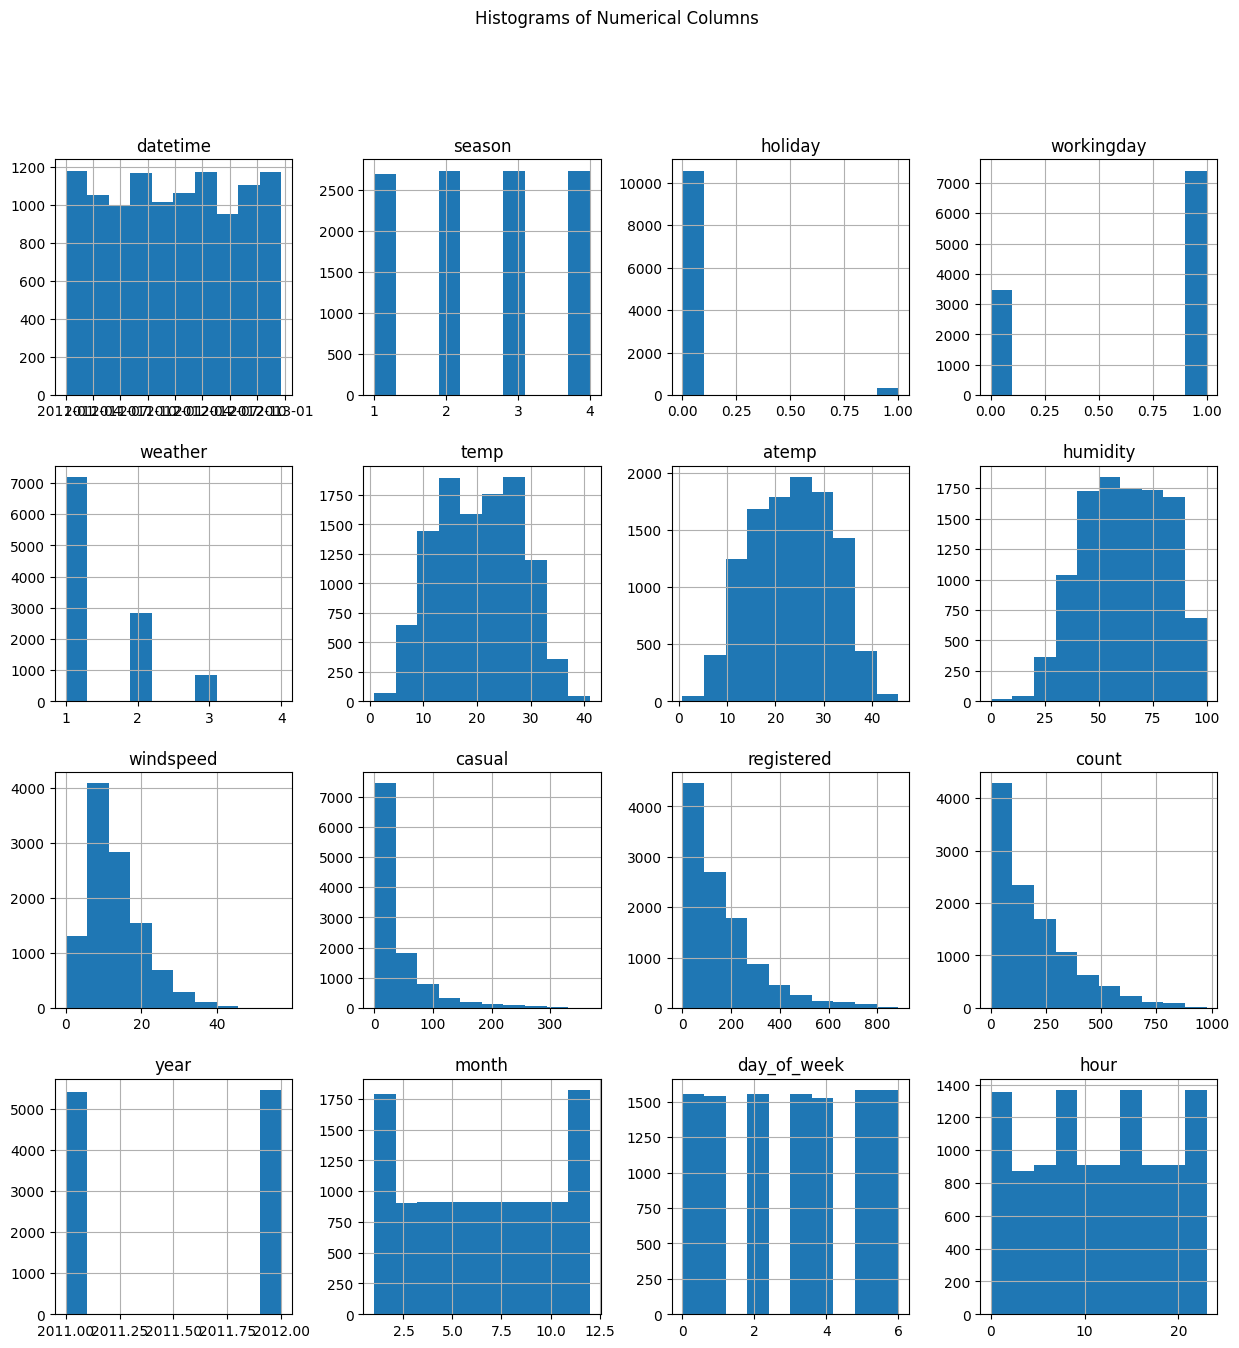

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns
df.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numerical Columns")
plt.show()


Plot the distributions of all numerical columns using box plots.

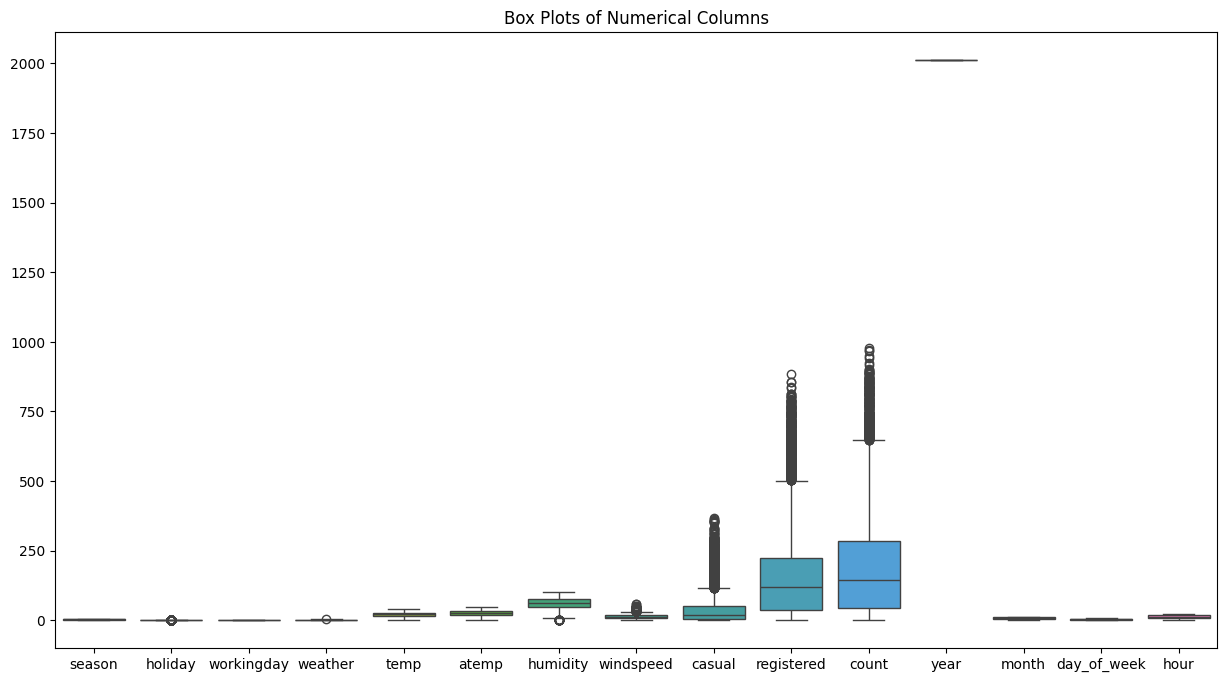

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient="v")
plt.title("Box Plots of Numerical Columns")
plt.show()

Using the date column, create new columns for year, month, day of the week, and hour of the day.

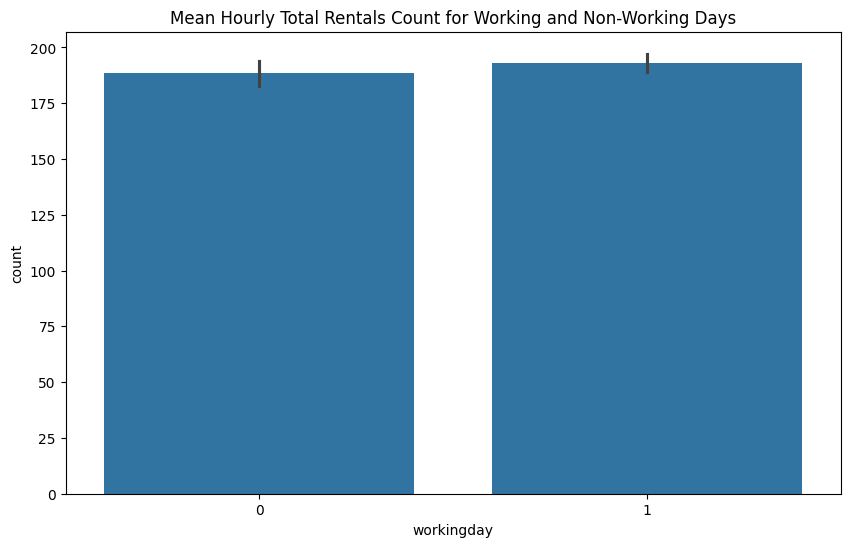

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot mean rentals count for working and non-working days
plt.figure(figsize=(10, 6))
sns.barplot(x="workingday", y="count", data=df, estimator=np.mean)
plt.title("Mean Hourly Total Rentals Count for Working and Non-Working Days")
plt.show()


Plot the mean of the hourly total rentals count for working and non-working days.

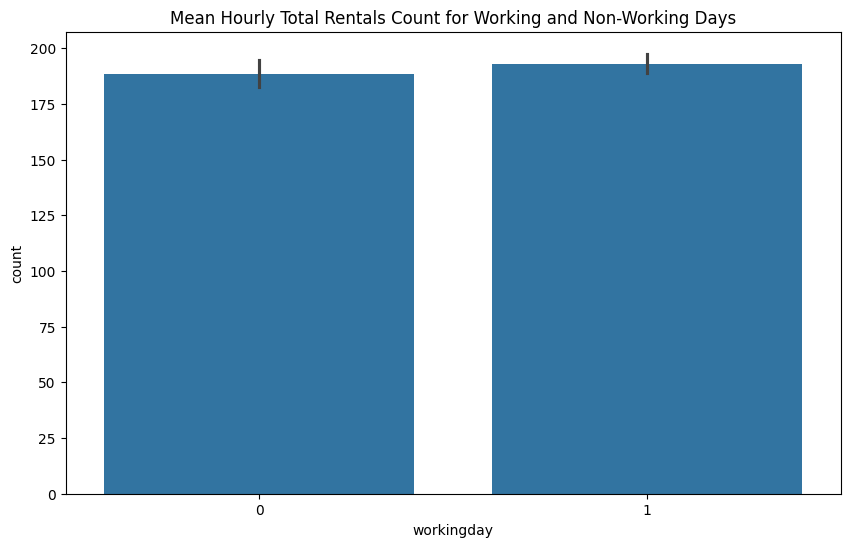

In [21]:
# Plot mean rentals count for working and non-working days
plt.figure(figsize=(10, 6))
sns.barplot(x="workingday", y="count", data=df, estimator=np.mean)
plt.title("Mean Hourly Total Rentals Count for Working and Non-Working Days")
plt.show()


 Plot the mean of the hourly total rentals count for different months combined for both years.

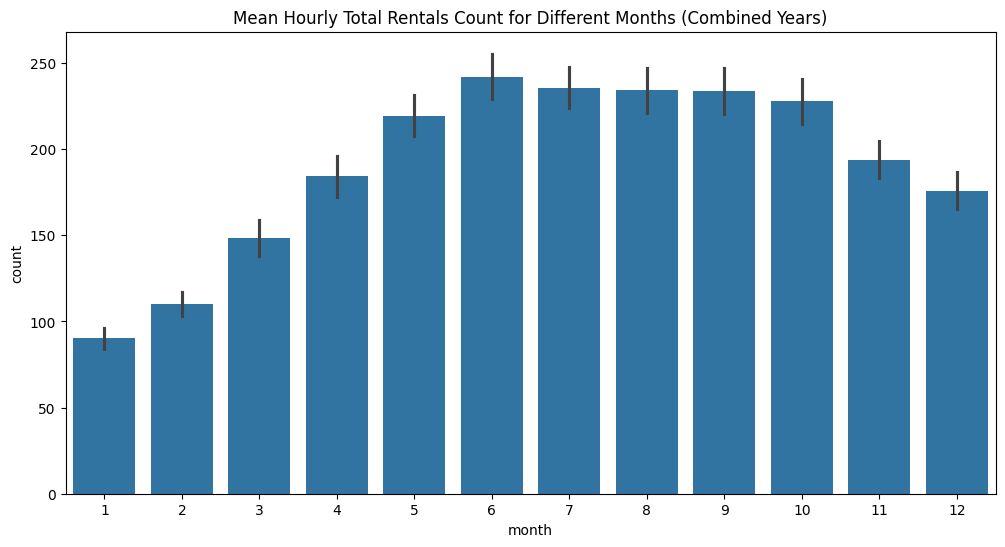

In [22]:
# Plot mean rentals count for different months combined for both years
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="count", data=df, estimator=np.mean)
plt.title("Mean Hourly Total Rentals Count for Different Months (Combined Years)")
plt.show()


 Plot the mean of the hourly total rentals count for different months separately in a multi-panel figure.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


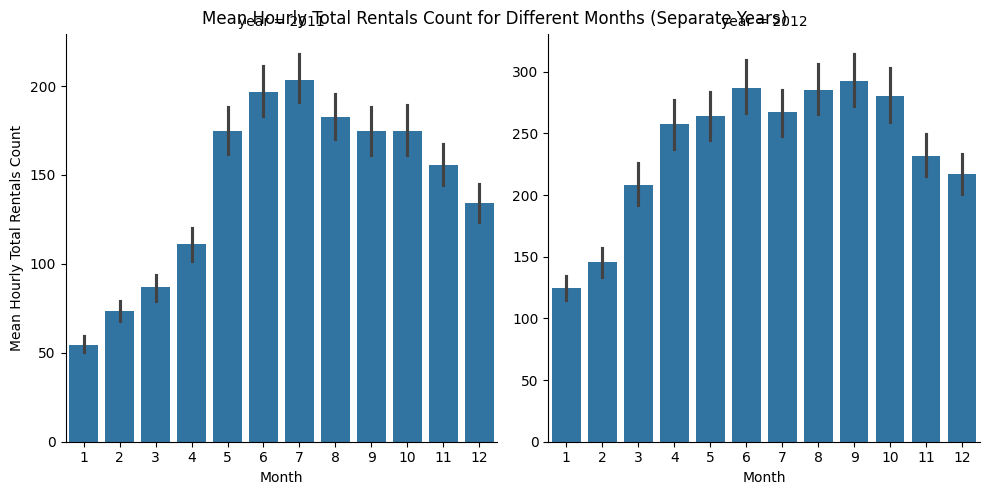

In [23]:
# Plot mean rentals count for different months separately in a multi-panel figure
g = sns.FacetGrid(df, col="year", col_wrap=2, height=5, sharey=False)
g.map(sns.barplot, "month", "count", estimator=np.mean)
g.set_axis_labels("Month", "Mean Hourly Total Rentals Count")
plt.suptitle("Mean Hourly Total Rentals Count for Different Months (Separate Years)")
plt.show()


Plot the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories.

/var/folders/xw/_jgqhcrx7pg1jnb_7m5hftfc0000gn/T/ipykernel_3632/822031670.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="weather", y="count", data=df, estimator=np.mean, ci=95)


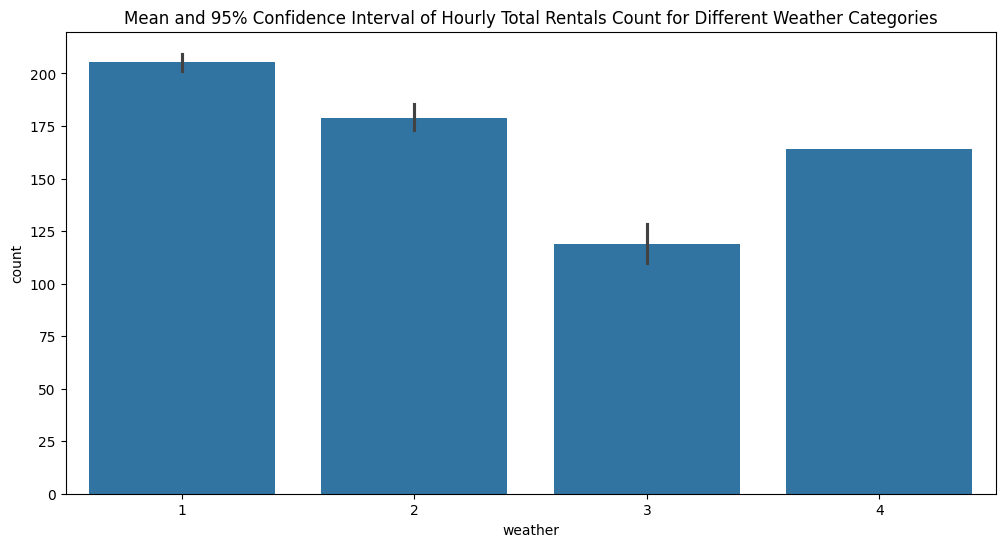

In [24]:
# Plot mean and confidence interval for hourly total rentals count for different weather categories
plt.figure(figsize=(12, 6))
sns.barplot(x="weather", y="count", data=df, estimator=np.mean, ci=95)
plt.title("Mean and 95% Confidence Interval of Hourly Total Rentals Count for Different Weather Categories")
plt.show()


 Plot the mean of the hourly total rentals count versus the hour of the day.

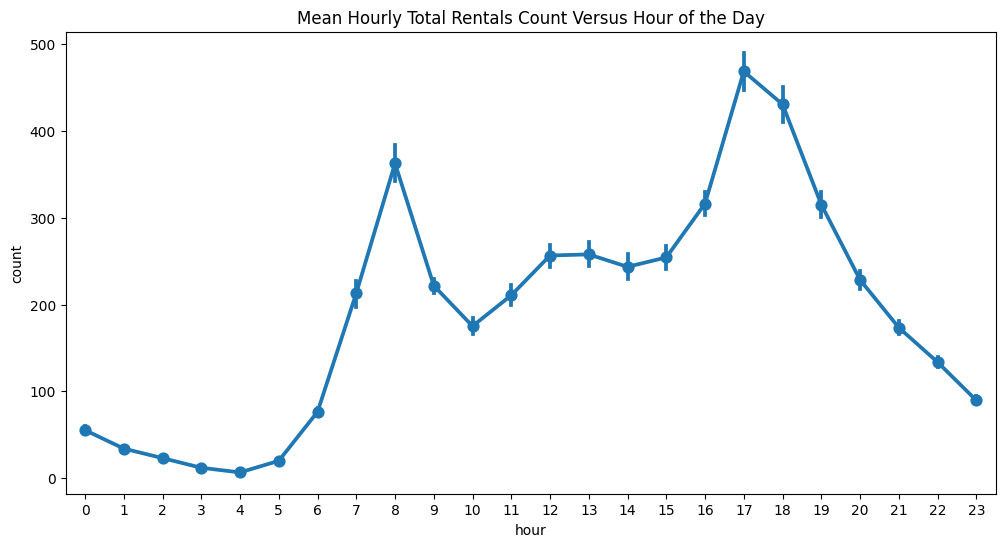

In [25]:
# Plot mean rentals count versus hour of the day
plt.figure(figsize=(12, 6))
sns.pointplot(x="hour", y="count", data=df, estimator=np.mean)
plt.title("Mean Hourly Total Rentals Count Versus Hour of the Day")
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------